# FarmPulse Phase 1 – Data Exploration & Cleaning

## 1️ Import Libraries

In [19]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


## 2️ Load Dataset

In [3]:
df = pd.read_csv("/workspaces/FarmPulse-Smart-Agriculture-App/Data/raw/FarmPulse_data.csv")
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (9986, 20)


,Farmer_ID,Farm_Size (ha),Crop_Type,Input_Needs,Location,Climate_Condition,Soil_Type,Soil_pH,Moisture,Nitrogen,Phosphorus,Potassium,Total_Precipitations,Yield_Per_Hectare (tons),Temp_Amplitude,Drought_Risk,Soil_pH_Category,Soil_Health,Climate_Stress,Fertilizer_Needs
0,1,6.59,Olives,Irrigation,Sfax,Humid,Loamy,6.58,17.80,20.33,29.12,23.22,250,3.54,14.2,Low,Neutral,Moderate,Low,Medium Need
1,2,18.85,Olives,Irrigation,Sfax,Humid,Loamy,6.93,18.21,16.88,16.35,27.39,250,3.40,14.2,Low,Neutral,Moderate,Low,Medium Need
2,3,45.47,Olives,Irrigation,Sfax,Humid,Loamy,6.00,23.34,21.00,20.76,30.78,250,4.01,14.2,Low,Neutral,Good,Low,Medium Need
3,4,8.43,Olives,Irrigation,Sfax,Humid,Loamy,6.72,28.72,24.80,23.10,24.00,250,3.48,14.2,Low,Neutral,Good,Low,Medium Need
4,5,31.24,Olives,Irrigation,Sfax,Humid,Loamy,6.69,25.56,19.58,24.05,32.81,250,4.20,14.2,Low,Neutral,Good,Low,Medium Need


## 3️ Inspect Dataset

In [4]:
print(df.info())

<class 'pandas.DataFrame'>
RangeIndex: 9986 entries, 0 to 9985
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Farmer_ID                 9986 non-null   int64  
 1   Farm_Size (ha)            9986 non-null   float64
 2   Crop_Type                 9986 non-null   str    
 3   Input_Needs               9986 non-null   str    
 4   Location                  9986 non-null   str    
 5   Climate_Condition         9986 non-null   str    
 6   Soil_Type                 9986 non-null   str    
 7   Soil_pH                   9986 non-null   float64
 8   Moisture                  9986 non-null   float64
 9   Nitrogen                  9986 non-null   float64
 10  Phosphorus                9986 non-null   float64
 11  Potassium                 9986 non-null   float64
 12  Total_Precipitations      9986 non-null   int64  
 13  Yield_Per_Hectare (tons)  9986 non-null   float64
 14  Temp_Amplitude     

In [5]:
df.shape

(9986, 20)

In [6]:
df.describe()

,Farmer_ID,Farm_Size (ha),Soil_pH,Moisture,Nitrogen,Phosphorus,Potassium,Total_Precipitations,Yield_Per_Hectare (tons),Temp_Amplitude
count,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000
mean,4993.500000,21.054096,6.611639,23.654221,28.370782,20.362366,27.675624,426.475065,4.778002,14.358412
std,2882.854228,13.596025,0.440522,8.602600,9.479868,7.024484,10.276479,254.603391,6.254534,1.051320
min,1.000000,1.010000,5.500000,5.010000,5.100000,5.040000,5.010000,90.000000,1.400000,12.900000
25%,2497.250000,8.922500,6.280000,17.520000,21.170000,15.200000,20.092500,250.000000,2.750000,13.500000
50%,4993.500000,19.105000,6.630000,24.725000,27.690000,19.920000,27.310000,300.000000,3.420000,14.200000
75%,7489.750000,30.570000,6.920000,29.400000,35.440000,26.090000,35.627500,700.000000,4.000000,14.800000
max,9986.000000,50.000000,7.500000,40.000000,49.990000,34.990000,49.990000,900.000000,39.600000,17.300000


In [7]:
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 Farmer_ID                   0
Farm_Size (ha)              0
Crop_Type                   0
Input_Needs                 0
Location                    0
Climate_Condition           0
Soil_Type                   0
Soil_pH                     0
Moisture                    0
Nitrogen                    0
Phosphorus                  0
Potassium                   0
Total_Precipitations        0
Yield_Per_Hectare (tons)    0
Temp_Amplitude              0
Drought_Risk                0
Soil_pH_Category            0
Soil_Health                 0
Climate_Stress              0
Fertilizer_Needs            0
dtype: int64


In [8]:
print(df.columns.tolist())


['Farmer_ID', 'Farm_Size (ha)', 'Crop_Type', 'Input_Needs', 'Location', 'Climate_Condition', 'Soil_Type', 'Soil_pH', 'Moisture', 'Nitrogen', 'Phosphorus', 'Potassium', 'Total_Precipitations', 'Yield_Per_Hectare (tons)', 'Temp_Amplitude', 'Drought_Risk', 'Soil_pH_Category', 'Soil_Health', 'Climate_Stress', 'Fertilizer_Needs']


## 4️ EDA

In [10]:
numeric_cols = ['Farm_Size (ha)', 'Soil_pH', 'Moisture', 'Nitrogen', 'Phosphorus', 
                'Potassium', 'Total_Precipitations', 'Yield_Per_Hectare (tons)', 'Temp_Amplitude']

categorical_cols = ['Crop_Type', 'Input_Needs', 'Location', 'Climate_Condition', 
                    'Soil_Type', 'Soil_pH_Category', 'Soil_Health', 'Climate_Stress', 'Fertilizer_Needs']



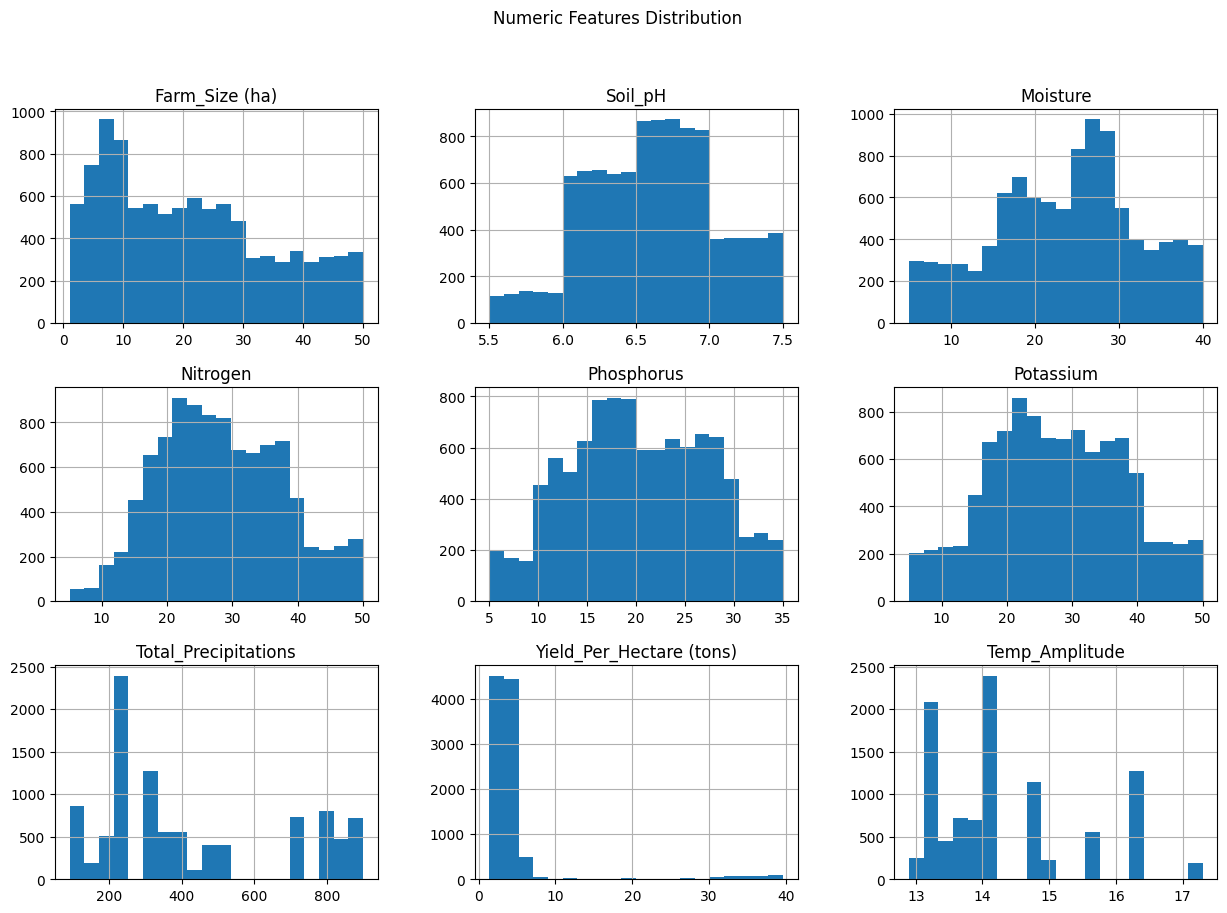

In [11]:
# Histograms
df[numeric_cols].hist(figsize=(15,10), bins=20)
plt.suptitle("Numeric Features Distribution")
plt.show()

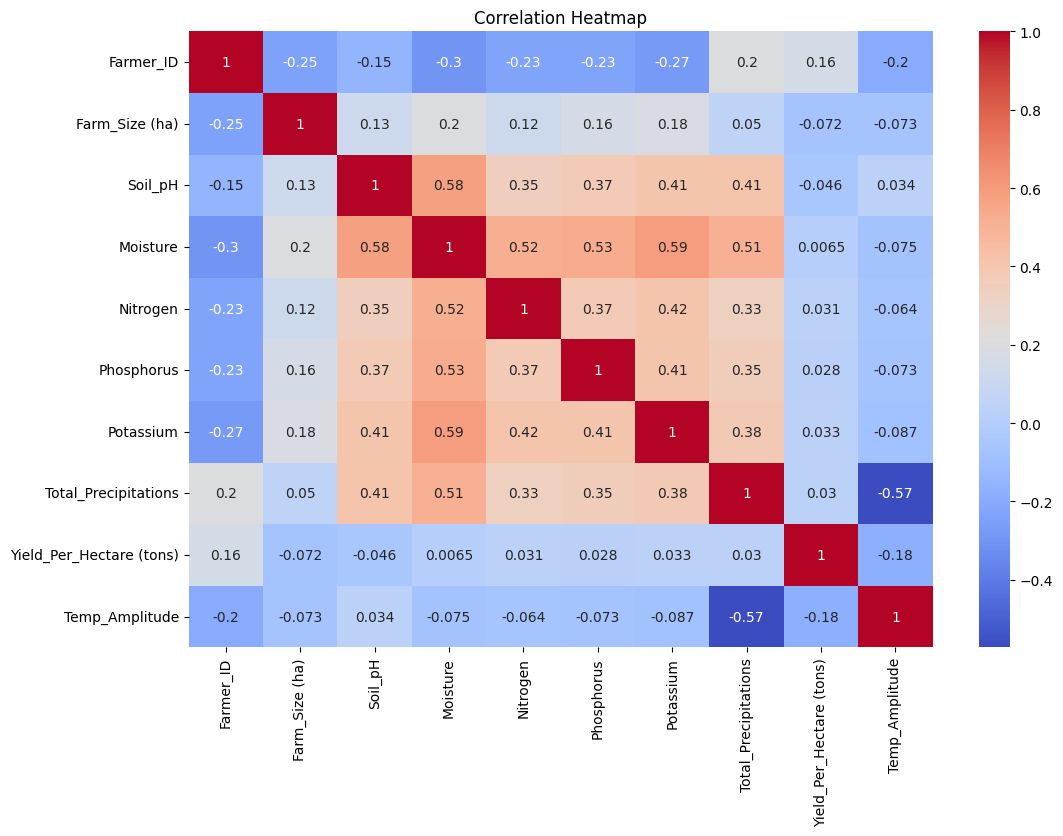

In [15]:
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


## 5️ Define Target

In [23]:
X = df.drop("Yield_Per_Hectare (tons)", axis=1)
y = df["Yield_Per_Hectare (tons)"]


In [24]:
numeric_features = X.select_dtypes(include="number").columns
categorical_features = X.select_dtypes(include="object").columns


/tmp/ipykernel_946/1670170809.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_features = X.select_dtypes(include="object").columns


## 6️ Create Preprocessing Pipeline

In [26]:
# Numeric Pipeline
numeric_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical Pipeline
categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Combine
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_pipeline, numeric_features),
    ("cat", categorical_pipeline, categorical_features)
])

full_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor)
])

# Fit & transform
X_processed = full_pipeline.fit_transform(X)

print("Processed feature shape:", X_processed.shape)




Processed feature shape: (9986, 64)


In [30]:
import os
import joblib


# Save the pipeline
joblib.dump(full_pipeline, "/workspaces/FarmPulse-Smart-Agriculture-App/models/preprocessing_pipeline.pkl")
print("Preprocessing Pipeline saved!")



Preprocessing Pipeline saved!
